In [3]:
# Import models
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
import re, random, os
import json

from datetime import datetime, timedelta

from sklearn import tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Modelling
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image


In [5]:
# Load mastersheet
sepsis_mastersheet_clean = pd.read_csv('sepsis_mastersheet_LR.csv')
list(sepsis_mastersheet_clean.columns)

['Age',
 'first_blood_pressure_panel_with_all_children_optional_value',
 'first_oxgyen_saturation_in_arterial_blood_value',
 'first_respiratory_rate_value',
 'first_heart_rate_value',
 'first_body_temperature_value',
 'highest_respiratory_rate_value',
 'highest_heart_rate_value',
 'highest_body_temperature_value',
 'lowest_blood_pressure_panel_with_all_children_optional_value',
 'lowest_oxgyen_saturation_in_arterial_blood_value',
 'inrpt_value',
 'anion_gap_value',
 'bicarbonate_value',
 'chloride_value',
 'creatinine_value',
 'potassium_value',
 'sodium_value',
 'urea_nitrogen_value',
 'hemoglobin_value',
 'lymphocytes_value',
 'neutrophils_value',
 'platelet_count_value',
 'white_blood_cells_value',
 'alanine_aminotransferase_alt_value',
 'albumin_value',
 'alkaline_phosphatase_value',
 'asparate_aminotransferase_ast_value',
 'bilirubin,_total_value',
 'lipase_value',
 'lactate_value',
 'magnesium_value',
 'calcium,_total_value',
 'phosphate_value',
 'sepsis_risk',
 'Language_en',
 '

In [7]:
drop = ['enc_arrival_EMERGENCY ROOM',
 'enc_arrival_PHYSICIAN REFERRAL',
 'enc_arrival_UNKNOWN',
 'enc_arrival_WALK IN',
 'highest_respiratory_rate_value',
 'highest_heart_rate_value',
 'highest_body_temperature_value',
 'lowest_blood_pressure_panel_with_all_children_optional_value',
 'lowest_oxgyen_saturation_in_arterial_blood_value']

In [9]:
sepsis_mastersheet_clean = sepsis_mastersheet_clean.drop(columns = drop)

In [11]:
sepsis_mastersheet_clean

,Age,first_blood_pressure_panel_with_all_children_optional_value,first_oxgyen_saturation_in_arterial_blood_value,first_respiratory_rate_value,first_heart_rate_value,first_body_temperature_value,inrpt_value,anion_gap_value,bicarbonate_value,chloride_value,...,sepsis_risk,Language_en,Gender_female,Race_ Black or African American,Race_American Indian or Alaska Native,Race_Asian,Race_Unknown/other,Race_White,Ethnicity_Hispanic or Latino,enc_arrival_AMBULANCE
0,31,138,100.0,18,124.0,98.3,1.1,20,34.0,78,...,False,True,True,False,False,False,False,True,False,False
1,69,118,97.0,18,80.0,98.4,1.1,15,24.0,105,...,False,True,True,True,False,False,False,False,False,False
2,32,118,98.0,16,88.0,97.9,1.1,16,25.0,98,...,False,True,False,False,False,False,False,True,False,False
3,54,173,100.0,18,127.0,96.0,1.1,17,22.0,101,...,False,True,True,False,False,False,False,True,False,False
4,45,149,100.0,20,101.0,98.2,1.1,14,29.0,102,...,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56866,51,146,100.0,16,96.0,98.1,1.1,16,21.0,102,...,False,True,False,False,False,False,False,True,False,False
56867,19,131,100.0,16,66.0,97.9,1.1,14,27.0,100,...,False,True,False,True,False,False,False,False,False,False
56868,92,160,95.0,16,66.0,98.3,1.1,15,24.0,101,...,False,True,False,False,False,False,False,True,False,True
56869,27,154,100.0,16,86.0,97.0,1.1,14,23.0,106,...,False,True,True,True,False,False,False,False,False,False


In [ ]:
# Test train split

In [13]:
# Train and test split
X = sepsis_mastersheet_clean.drop(columns = 'sepsis_risk')
y = sepsis_mastersheet_clean['sepsis_risk']

In [15]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=0)

In [ ]:
Train RF model

In [17]:
# Random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred_rf = rf.predict(X_test)

In [21]:
y_scores_rf = rf.predict_proba(X_test)[:, 1]

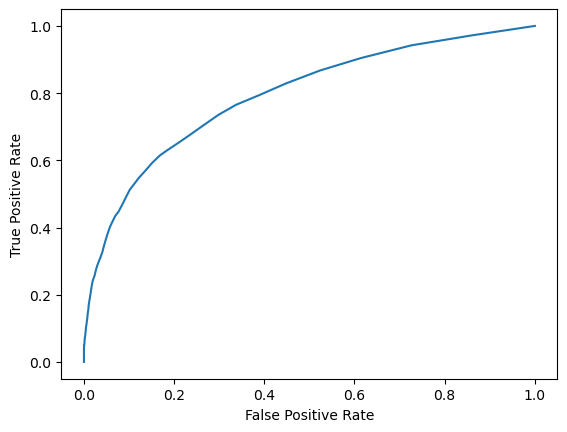

In [23]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf) 

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
score = roc_auc_score(y_test, y_scores_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(f"ROC AUC: {score:.4f}")

Accuracy: 0.9246278279216973
Precision: 0.6951219512195121
Recall: 0.08444444444444445
ROC AUC: 0.7921


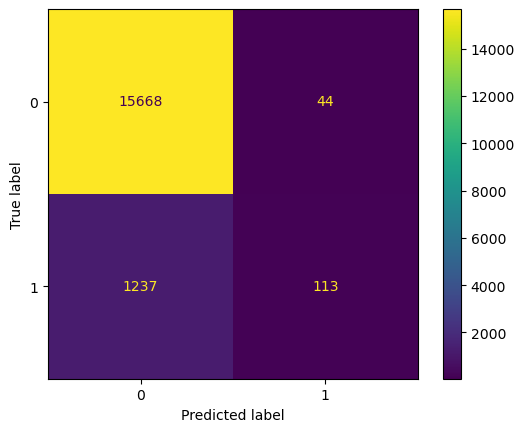

In [103]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

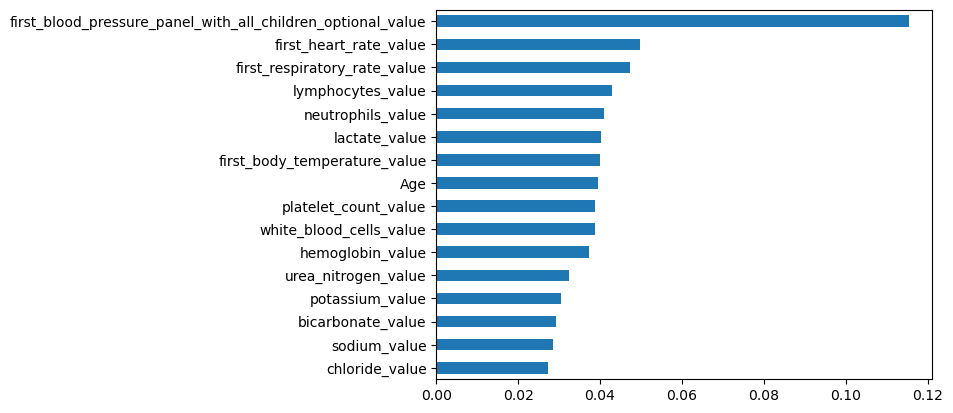

In [175]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
top_16_features = feature_importances.nlargest(16)
top_16_features = top_16_features.sort_values(ascending=True)
# Plot a simple bar chart
top_16_features.plot.barh();


In [27]:
xgbmodel = xgb.XGBClassifier()
xgbmodel.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
# make predictions for test data
y_pred_xgb = xgbmodel.predict(X_test)

#Probabilities for model
y_scores_xgb = xgbmodel.predict_proba(X_test)[:, 1]

In [31]:
# Evaluation of model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_score = roc_auc_score(y_test, y_scores_xgb)

print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print(f"ROC AUC: {xgb_score:.4f}")

Accuracy: 0.9229281444144883
Precision: 0.5449871465295629
Recall: 0.15703703703703703
ROC AUC: 0.7912


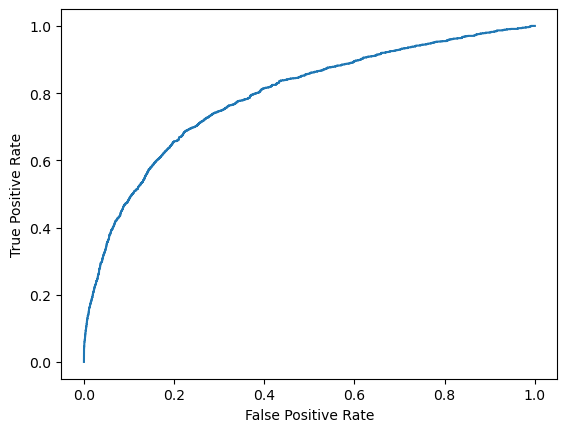

In [33]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_xgb)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<Figure size 1000x600 with 0 Axes>

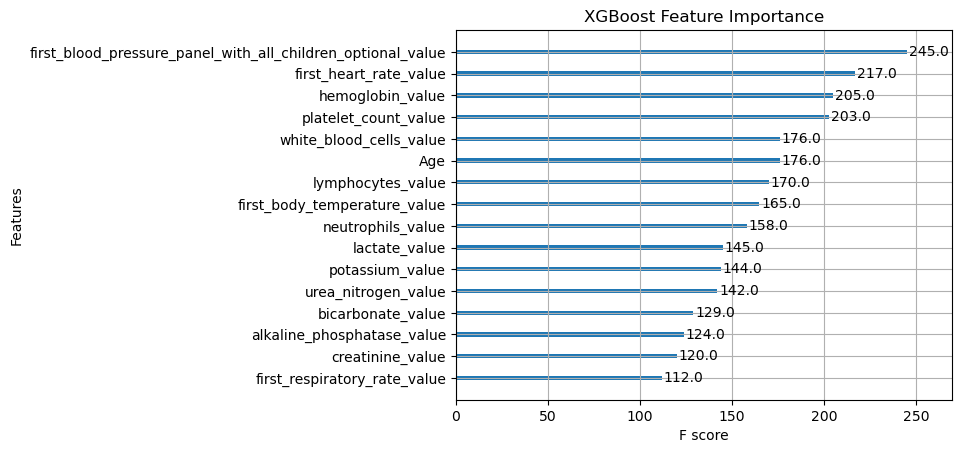

In [157]:
# Feature importance of XGB

plt.figure(figsize=(10, 6))
xgb.plot_importance(xgbmodel, max_num_features=16)
plt.title("XGBoost Feature Importance")
plt.show()

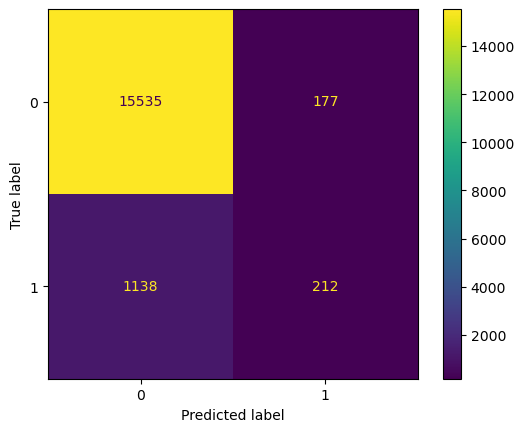

In [89]:
# Create the confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=xgb_cm).plot();

Two ROC curves on one chart

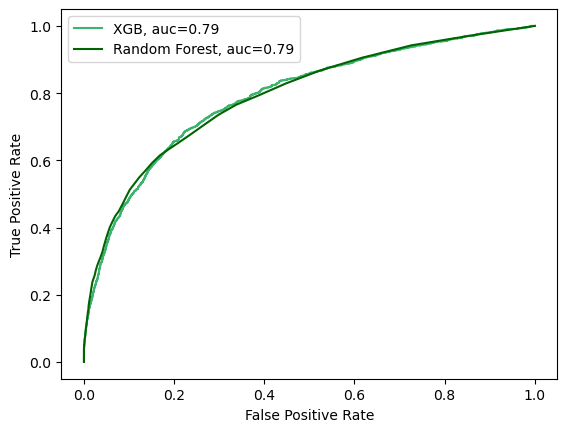

In [53]:

plt.figure(0).clf()

fpr, tpr, thresholds = roc_curve(y_test, y_scores_xgb)
auc = roc_auc_score(y_test, y_scores_xgb)
plt.plot(fpr, tpr, color='mediumseagreen', label="XGB, auc="+str(round(auc, 2)))

fpr, tpr, thresh = roc_curve(y_test, y_scores_rf)
auc = roc_auc_score(y_test, y_scores_rf)
plt.plot(fpr, tpr, color='darkgreen', label="Random Forest, auc="+str(round(auc, 2)))  

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=0)

plt.show()

In [91]:
def calculate_utility_original(y_true, y_scores, utility_values):
    # Calculate ROC curve points
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Total number of positive and negative samples
    P = sum(y_true)
    N = len(y_true) - P
    
    # Unpack utility values
    u_tp, u_fp, u_tn, u_fn = utility_values
    
    # Calculate utility for each threshold
    utilities = []
    for i in range(len(thresholds)):
        TP = tpr[i] * P
        FP = fpr[i] * N
        FN = P - TP
        TN = N - FP
        
        total_utility = (TP * u_tp + FP * u_fp + TN * u_tn + FN * u_fn) / len(y_true)
        utilities.append(total_utility)
    
    # Find the threshold that maximizes utility
    best_idx = np.argmax(utilities)
    best_threshold = thresholds[best_idx]
    best_utility = utilities[best_idx]
    
    return best_threshold, best_utility, thresholds, utilities

In [93]:
# Utility for XGB
system_utility_values = (90, 60, 100, 0)  # (TP, FP, TN, FN)
patient_utility_values = (90, 80, 100, 0)  # (TP, FP, TN, FN)

best_sys_threshold, best_sys_utility, all_sys_thresholds, all_sys_utilities = calculate_utility_original(y_test, y_scores_xgb, system_utility_values)
print(f"Best system threshold: {best_sys_threshold}")
print(f"Best system utility: {best_sys_utility}")

best_pat_threshold, best_pat_utility, all_pat_thresholds, all_pat_utilities = calculate_utility_original(y_test, y_scores_xgb, patient_utility_values)
print(f"\nBest patient threshold: {best_pat_threshold}")
print(f"Best patient utility: {best_pat_utility}")


Best system threshold: 0.36516520380973816
Best system utility: 92.81561364435588

Best patient threshold: 0.17431609332561493
Best patient utility: 93.78501934122612


In [105]:
# Utility for RF
best_sys_threshold_rf, best_sys_utility_rf, all_sys_thresholds_rf, all_sys_utilities_rf = calculate_utility_original(y_test, y_scores_rf, system_utility_values)
print(f"Best system threshold: {best_sys_threshold_rf}")
print(f"Best system utility: {best_sys_utility_rf}")

best_pat_threshold_rf, best_pat_utility_rf, all_pat_thresholds_rf, all_pat_utilities_rf = calculate_utility_original(y_test, y_scores_rf, patient_utility_values)
print(f"\nBest patient threshold: {best_pat_threshold_rf}")
print(f"Best patient utility: {best_pat_utility_rf}")


Best system threshold: 0.32
Best system utility: 93.11804008908686

Best patient threshold: 0.22
Best patient utility: 93.92333841284726


In [151]:
def plot_utility_comparison(y_true, y_scores, system_utility_values, patient_utility_values):
    # Calculate utilities for both models
    best_sys_threshold, best_sys_utility, all_sys_thresholds, all_sys_utilities = calculate_utility_original(y_true, y_scores, system_utility_values)
    best_pat_threshold, best_pat_utility, all_pat_thresholds, all_pat_utilities = calculate_utility_original(y_true, y_scores, patient_utility_values)

    # Create the plot
    plt.figure(figsize=(7, 5))
    plt.plot(all_sys_thresholds, all_sys_utilities, label='System Utility', color='mediumseagreen')
    plt.plot(all_pat_thresholds, all_pat_utilities, label='Patient Utility', color='darkgreen')

    # Add vertical lines for best thresholds
    plt.axvline(best_sys_threshold, color='mediumseagreen', linestyle='--', label=f'Best System Threshold: {best_sys_threshold:.2f}')
    plt.axvline(best_pat_threshold, color='darkgreen', linestyle='--', label=f'Best Patient Threshold: {best_pat_threshold:.2f}')

    # Customize the plot
    plt.title("Utility Comparison XGB Model: System vs Patient")
    plt.xlabel("Threshold")
    plt.ylabel("Utility")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

    # Print the best thresholds and utilities
    print(f"Best system threshold: {best_sys_threshold:.4f}")
    print(f"Best system utility: {best_sys_utility:.4f}")
    print(f"\nBest patient threshold: {best_pat_threshold:.4f}")
    print(f"Best patient utility: {best_pat_utility:.4f}")

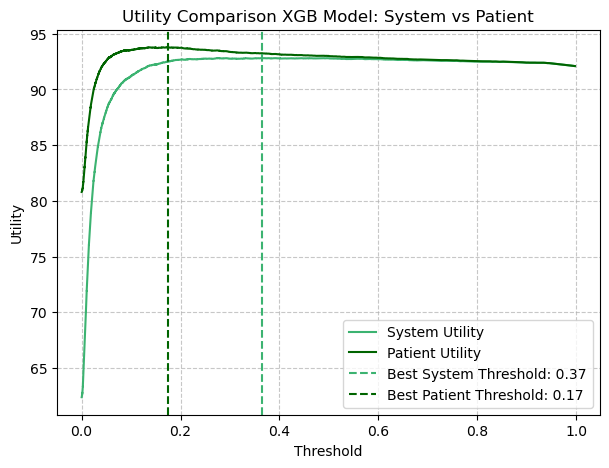

Best system threshold: 0.3652
Best system utility: 92.8156

Best patient threshold: 0.1743
Best patient utility: 93.7850


In [153]:
plot_utility_comparison(y_test, y_scores_xgb, system_utility_values, patient_utility_values)

In [181]:
# EDA

sepsis_mastersheet = pd.read_csv('sepsis_mastersheet.csv')

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_40067/685710313.py:3: DtypeWarning: Columns (6,7,8,9,10,11,12,157,158,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  sepsis_mastersheet = pd.read_csv('sepsis_mastersheet.csv')


In [185]:
list(sepsis_mastersheet.columns)

['enc_id',
 'enc_start_time',
 'enc_end_time',
 'enc_LOS',
 'enc_arrival',
 'enc_disp',
 'adm_id_x',
 'adm_type',
 'adm_start_time',
 'adm_end_time',
 'adm_LOS',
 'adm_source',
 'adm_disp',
 'enc_start_time_UTC',
 'Age',
 'patient_id',
 'Gender',
 'Race',
 'Ethnicity',
 'Birthdate',
 'Language',
 'final_LOS',
 'final_source',
 'discharge_outcome',
 'death',
 'first_blood_pressure_panel_with_all_children_optional_datetime',
 'first_blood_pressure_panel_with_all_children_optional_value',
 'first_oxgyen_saturation_in_arterial_blood_datetime',
 'first_oxgyen_saturation_in_arterial_blood_value',
 'first_respiratory_rate_datetime',
 'first_respiratory_rate_value',
 'first_heart_rate_datetime',
 'first_heart_rate_value',
 'first_body_temperature_datetime',
 'first_body_temperature_value',
 'newest_blood_pressure_panel_with_all_children_optional_datetime',
 'newest_blood_pressure_panel_with_all_children_optional_value',
 'newest_oxgyen_saturation_in_arterial_blood_datetime',
 'newest_oxgyen_sa

In [187]:
sepsis_mastersheet = sepsis_mastersheet[['enc_arrival', 'Age', 'Gender', 'Race', 'Ethnicity', 'Language', 'sepsis_risk']]

In [205]:
sepsis_mastersheet

,enc_arrival,Age,Gender,Race,Ethnicity,Language,sepsis_risk
0,PHYSICIAN REFERRAL,31,female,White,Not Hispanic or Latino,en,False
1,PHYSICIAN REFERRAL,69,female,Black or African American,Not Hispanic or Latino,en,False
2,EMERGENCY ROOM,32,male,White,Not Hispanic or Latino,en,False
3,PHYSICIAN REFERRAL,54,female,White,Not Hispanic or Latino,en,False
4,EMERGENCY ROOM,45,female,White,Not Hispanic or Latino,en,False
...,...,...,...,...,...,...,...
56866,WALK IN,51,male,White,Not Hispanic or Latino,en,False
56867,WALK IN,19,male,Black or African American,Not Hispanic or Latino,en,False
56868,AMBULANCE,92,male,White,Not Hispanic or Latino,en,False
56869,WALK IN,27,female,Black or African American,Not Hispanic or Latino,en,False


In [ ]:
sepsis_mastersheet['Race'].replace('unknown', 'Unknown/other', inplace=True)
sepsis_mastersheet['Race'].replace('other', 'Unknown/other', inplace=True)
sepsis_mastersheet['Race'].replace('asked but unknown', 'Unknown/other', inplace=True)
sepsis_mastersheet['Race'].replace('Black or African American', 'Black/AfricanAmerican', inplace=True)
sepsis_mastersheet['Race'].replace('Native Hawaiian or Other Pacific Islander', 'Unknown/other', inplace=True)
sepsis_mastersheet['Race'].replace('American Indian or Alaska Native', 'Unknown/other', inplace=True)

In [215]:
sepsis_mastersheet['Race'].value_counts()

Race
White                         40929
 Black or African American    11039
Unknown/other                  2742
Asian                          2161
Name: count, dtype: int64

In [ ]:
sepsis_mastersheet['enc_arrival'].replace('WALK-IN/SELF REFERRAL', 'WALK IN', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('CLINIC REFERRAL', 'PHYSICIAN REFERRAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('TRANSFER FROM SKILLED NURSING FACILITY', 'AMBULANCE', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('HELICOPTER', 'AMBULANCE', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('AMBULATORY SURGERY TRANSFER', 'PHYSICIAN REFERRAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('OTHER', 'UNKNOWN', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('PROCEDURE SITE', 'TRANSFER FROM HOSPITAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('INFORMATION NOT AVAILABLE', 'UNKNOWN', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('INTERNAL TRANSFER TO OR FROM PSYCH', 'TRANSFER FROM HOSPITAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('PACU', 'TRANSFER FROM HOSPITAL', inplace=True)
sepsis_mastersheet['enc_arrival'].replace('TRANSFER FROM HOSPITAL', 'PHYSICIAN REFERRAL', inplace=True)

In [203]:
sepsis_mastersheet['enc_arrival'].value_counts()

enc_arrival
AMBULANCE             19621
WALK IN               19092
EMERGENCY ROOM        13541
PHYSICIAN REFERRAL     4075
UNKNOWN                 542
Name: count, dtype: int64

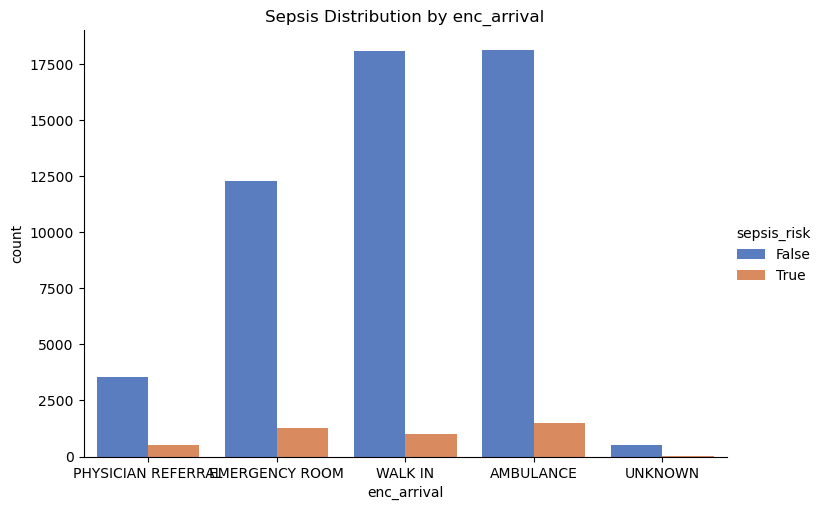

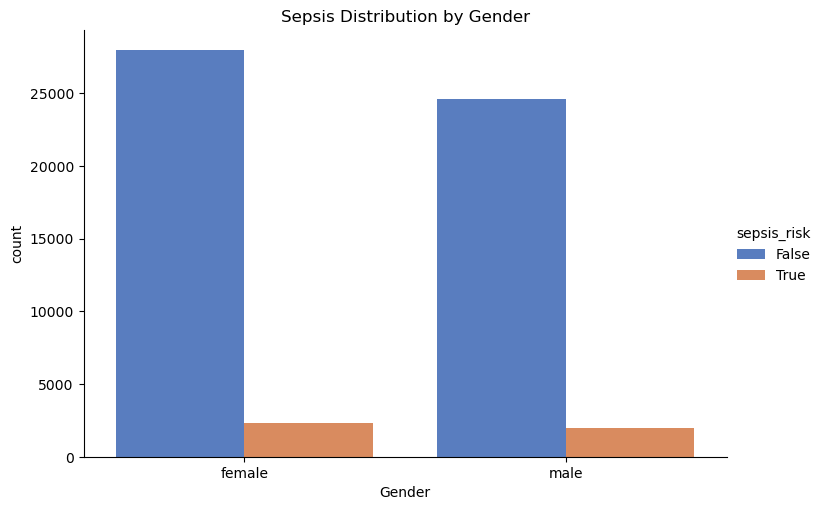

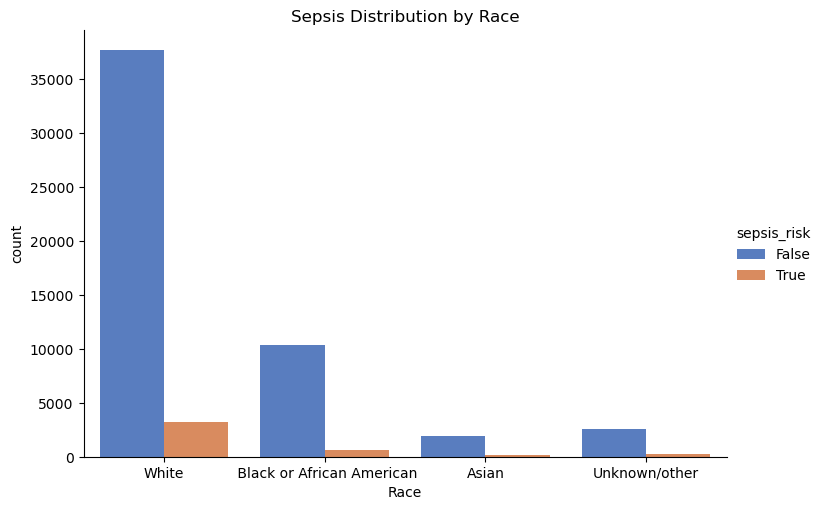

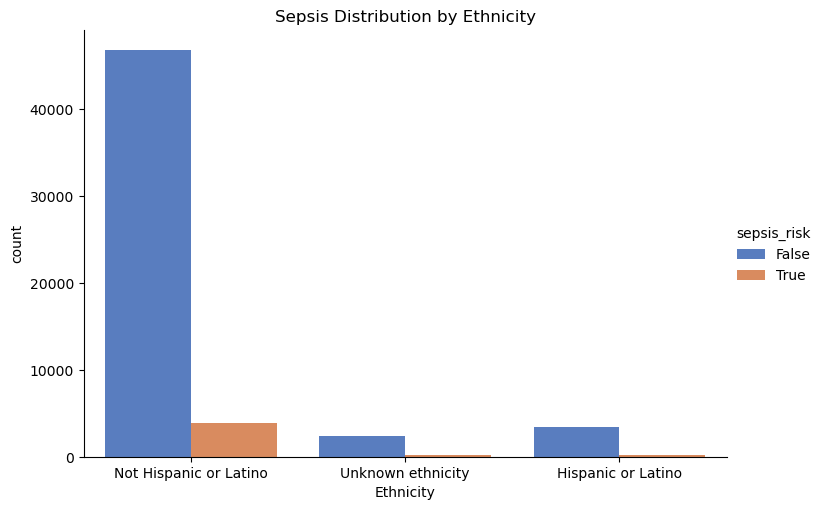

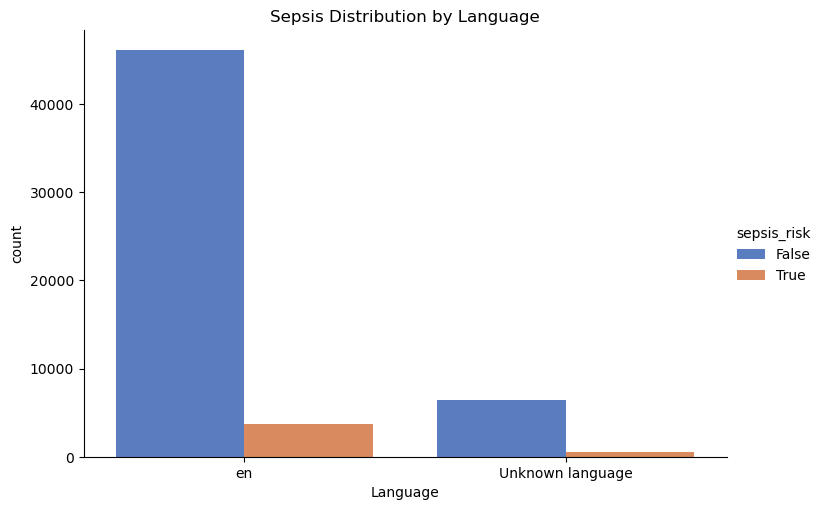

In [241]:
# List of categorical variables (modify based on your dataset)
categorical_vars = ['enc_arrival', 'Gender', 'Race', 'Ethnicity', 'Language']


for var in categorical_vars:
    sns.catplot(
        x=var,
        hue='sepsis_risk',
        data=sepsis_mastersheet,
        kind='count',
        height=5,
        aspect=1.5,
        palette='muted'
    ).set(title=f'Sepsis Distribution by {var}')
    plt.show()